In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os

In [4]:
# Model Opening
model_path = 'C_SIE+SHEAR'
model_ver = 'C_SIE_POS_SHEAR'

if 'POS+FLUX' in model_ver:
    constraint = 'pos_flux'
elif 'POS' in model_ver:
    constraint = 'pos'


# Load the data
with open(model_path + '/' + model_ver + '_optresult' + '.dat', 'r') as file:
    opt_result = file.readlines()

opt_result


with open(model_path + '/' + constraint + '_point' + '.py', 'r') as file:
    py = file.readlines()

py

['#!/usr/bin/env python\n',
 'import glafic\n',
 '\n',
 "glafic.init(0.3, 0.7, -1.0, 0.7, 'C_SIE+SHEAR/SIE_POS_SHEAR', 20.0, 20.0, 21.56, 21.56, 0.01, 0.01, 1, verb = 0)\n",
 '\n',
 "glafic.set_secondary('chi2_splane 0', verb = 0)\n",
 "glafic.set_secondary('chi2_checknimg 0', verb = 0)\n",
 "glafic.set_secondary('chi2_restart   -1', verb = 0)\n",
 "glafic.set_secondary('chi2_usemag    1', verb = 0)\n",
 "glafic.set_secondary('hvary          0', verb = 0)\n",
 "glafic.set_secondary('ran_seed -122000', verb = 0)\n",
 '\n',
 'glafic.startup_setnum(2, 0, 1)\n',
 "glafic.set_lens(1, 'sie', 0.261343256161012, 1.63e+02,  20.80, 20.75, 0.11, -4.0, 0.037, 0.0)\n",
 "glafic.set_lens(2, 'pert', 0.261343256161012, 1.0, 20.90, 20.64, 0.1, 140.0, 0.0, 0.001)\n",
 'glafic.set_point(1, 1.0, 20.78, 20.78)\n',
 '\n',
 'glafic.setopt_lens(1, 0, 1, 1, 1, 1, 1, 1, 0)\n',
 'glafic.setopt_lens(2, 0, 0, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_point(1, 0, 1, 1)\n',
 '\n',
 '# model_init needs to be done again w

In [5]:
# Observed Positions 
obs = pd.read_fwf('obs_point/obs_point_(POS+FLUX).dat', header=None, names=['x', 'y', 'm', 'pos_err', 'm_err', 'ex1', 'ex2'], skiprows=1)
obs

plot_obs = obs[['x', 'y', 'm']]
plot_obs['x'] = (plot_obs['x'] - 20) / 0.001
plot_obs['y'] = (plot_obs['y'] - 20) / 0.001
plot_obs

/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_1486/2689651074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_obs['x'] = (plot_obs['x'] - 20) / 0.001
/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_1486/2689651074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_obs['y'] = (plot_obs['y'] - 20) / 0.001


,x,y,m
0,777.73,302.54,4.27
1,1273.08,956.12,6.80
2,390.91,1050.57,5.98
3,819.81,1259.31,15.30


In [6]:
# Extract the line containing 'glafic.startup_setnum('
startup_setnum_line = next(line for line in py if 'glafic.startup_setnum(' in line)

set_point_line = next(line for line in py if 'glafic.set_point(' in line)

# Extract the first number inside the parentheses
extracted_value = int(re.search(r'glafic\.startup_setnum\((\d+)', startup_setnum_line).group(1))

print(extracted_value)

set_point = int(re.search(r'glafic\.set_point\((\d+)', set_point_line).group(1))

print(set_point)

2
1


In [7]:
# Model Values 
# Find the line containing 'lens   sie' in opt_result
model_input = model_path.lower()
if 'sie' in model_input:
    model_input_1 = 'sie'
if 'nfw' in model_input:
    model_input_1 = 'anfw'
if 'pow' in model_input:
    model_input_1 = 'pow'
if 'c_sie' in model_input:
    model_input_1 = 'sie'
if 'ein' in model_input:
    model_input_1 = 'ein'

print(model_input_1)


lens_sie_line_1 = next(line for line in reversed(opt_result) if 'lens   ' + model_input_1 in line)

print(lens_sie_line_1)

# Extract the values from the line
lens_sie_values_1 = lens_sie_line_1.split()[2:]
lens_sie_values_1 = [str(value) for value in lens_sie_values_1]
lens_sie_values_1

# Find the line containing 'glafic.set_point' in opt_result
set_point_line_1 = next(line for line in reversed(opt_result) if 'point' in line)

print(set_point_line_1)

# Extract the values from the line
set_point_values_1 = set_point_line_1.split()[1:]
set_point_values_1 = [str(value) for value in set_point_values_1]
set_point_values_1


sie
lens   sie     0.2613  1.640646e+02  2.081341e+01  2.076613e+01  8.474830e-02  3.087715e+01  3.817197e-02  0.000000e+00 

point  1.0000  2.081883e+01  2.077747e+01 



['1.0000', '2.081883e+01', '2.077747e+01']

In [8]:
if 'SHEAR' in model_path:
    model_input_2 = 'pert'

lens_sie_line_2 = next(line for line in reversed(opt_result) if 'lens   ' + model_input_2 in line)

print(lens_sie_line_2)

# Extract the values from the line
lens_sie_values_2 = lens_sie_line_2.split()[2:]
lens_sie_values_2 = [str(value) for value in lens_sie_values_2]
lens_sie_values_2

lens   pert    0.2613  1.000000e+00  2.088229e+01  2.068053e+01  3.406566e-02  1.449960e+02  0.000000e+00  1.000000e-03 



['0.2613',
 '1.000000e+00',
 '2.088229e+01',
 '2.068053e+01',
 '3.406566e-02',
 '1.449960e+02',
 '0.000000e+00',
 '1.000000e-03']

In [9]:
name = "'Kappa/" + model_path + '/' + model_ver + "'"
name

# Check if the file exists, and create it if it doesn't
file_path = 'Kappa/' + model_path + '/' + model_ver
if not os.path.exists(file_path):
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    with open(file_path, 'w') as f:
        f.write('')  # Create an empty file

In [10]:
model_input_1 = "'" + model_input_1 + "'"
model_input_2 = "'" + model_input_2 + "'"

print(model_input_1)
print(model_input_2)

# Read the existing file contents
with open('kappa_shear_glafic.py', 'r') as f:
    py = f.readlines()

# Update values and write back
with open('kappa_shear_glafic.py', 'w') as glafic_file:
    for line in py:
        if 'glafic.set_lens(1' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(1, {model_input_1}, {lens_sie_values_1[0]}, {lens_sie_values_1[1]}, {lens_sie_values_1[2]}, {lens_sie_values_1[3]}, {lens_sie_values_1[4]}, {lens_sie_values_1[5]}, {lens_sie_values_1[6]}, {lens_sie_values_1[7]})\n"
        if 'glafic.set_lens(2' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(2, {model_input_2}, {lens_sie_values_2[0]}, {lens_sie_values_2[1]}, {lens_sie_values_2[2]}, {lens_sie_values_2[3]}, {lens_sie_values_2[4]}, {lens_sie_values_2[5]}, {lens_sie_values_2[6]}, {lens_sie_values_2[7]})\n"
        elif 'glafic.init(' in line:
            line = f"glafic.init(0.3, 0.7, -1.0, 0.7, {name}, 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n"
        elif 'glafic.set_point(' in line:
            print('Found glafic.set_point')
            # Ensure values are up to date
            if set_point_values_1 is not None and len(set_point_values_1) == 3:
                line = f"glafic.set_point(1, 1.000, {set_point_values_1[1]}, {set_point_values_1[2]})\n"
            else:
                print("set_point_values is not set correctly.")
        glafic_file.write(line)

'sie'
'pert'
Found glafic.set_lens
Found glafic.set_lens
Found glafic.set_point


In [11]:
%run kappa_shear_glafic.py

######## writing lens properties
 zs = 1.000000e+00 
 output file name = Kappa/C_SIE+SHEAR/C_SIE_POS_SHEAR_lens.fits 



In [12]:
x_cent = float(set_point_values_1[1])
y_cent = float(set_point_values_1[2])
print(x_cent, y_cent)

# Predicted Positions 
pred_columns = ['x', 'y', 'mag', 'err']
pred_file = model_path + '/' + model_ver + '_point.dat'
pred = pd.read_fwf(pred_file, sep=' ', header=None, skiprows=1, names=pred_columns)
pred['x_plot'] = (pred['x'] - 20) / 0.001
pred['y_plot'] = (pred['y'] - 20) / 0.001
pred

# Remove the 5th image 
if len(pred) > 4:
    print('Removing the 5th image')
    lowest_mag_index = abs(pred['mag']).idxmin()
    pred = pred.drop(lowest_mag_index)


20.81883 20.77747
Removing the 5th image


In [13]:
# FITS File 
image = 'kappa/' + model_path + '/' + model_ver + '_lens' + '.fits'

hdu_list = fits.open(image)
hdu_list.info()

hdu_list[0].header

Filename: kappa/C_SIE+SHEAR/C_SIE_POS_SHEAR_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (1560, 1560, 8)   float32   


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                 1560 / length of data axis 1                          
NAXIS2  =                 1560 / length of data axis 2                          
NAXIS3  =                    8 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'LINEAR  '                                                            
CTYPE2  = 'LINEAR  '                                                            
CRPIX1  =                    1                                                  
CRPIX2  =                   

In [14]:
# Extract kappa 
kappa = hdu_list[0].data[3]
kappa = np.array(kappa)
kappa


array([[0.22850925, 0.22866225, 0.22881539, ..., 0.25866276, 0.2584874 ,
        0.25831217],
       [0.22864375, 0.228797  , 0.2289504 , ..., 0.2588284 , 0.25865272,
        0.25847712],
       [0.2287783 , 0.22893183, 0.22908549, ..., 0.25899416, 0.2588181 ,
        0.25864214],
       ...,
       [0.24319418, 0.24335407, 0.24351408, ..., 0.23543075, 0.23527634,
        0.23512204],
       [0.24305272, 0.24321233, 0.24337204, ..., 0.23528014, 0.23512602,
        0.234972  ],
       [0.24291134, 0.24307065, 0.24323006, ..., 0.23512964, 0.2349758 ,
        0.23482208]], dtype=float32)

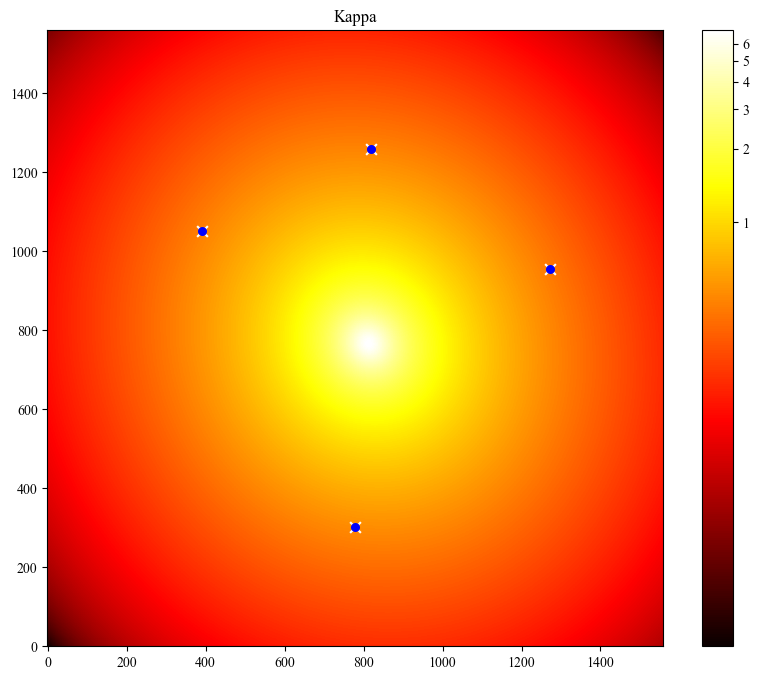

In [15]:
norm = ImageNormalize(stretch=LogStretch())
plt.figure(figsize=(10, 8))
plt.imshow(kappa, cmap='hot', interpolation='nearest', norm=norm)
plt.gca().invert_yaxis()
plt.colorbar()
plt.scatter(pred['x_plot'], pred['y_plot'], c='white', s=60, label='Predicted Positions', marker='x')
plt.scatter(plot_obs['x'], plot_obs['y'], c='blue', s=30, label='Observed Positions', marker='o')
plt.title('Kappa')
plt.show()

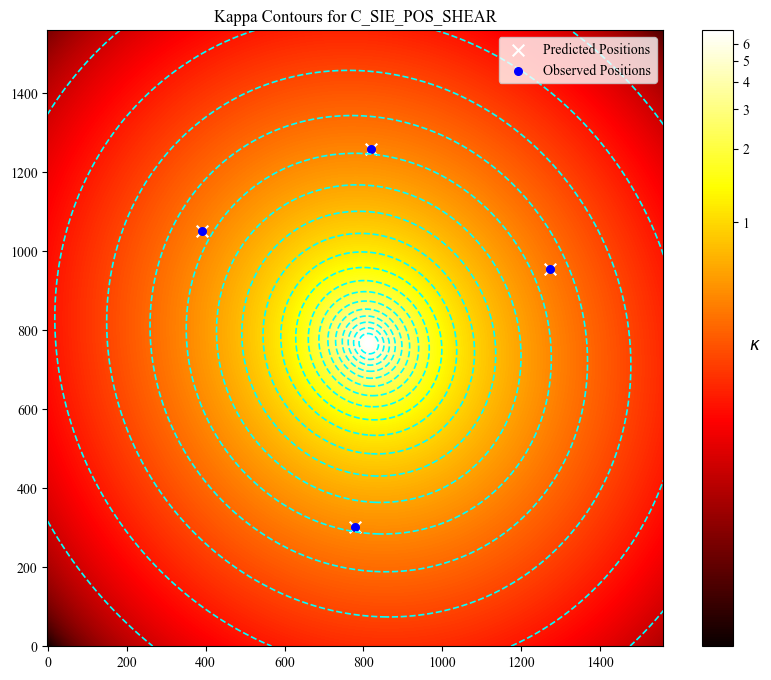

In [16]:
norm = ImageNormalize(kappa, stretch=LogStretch())
plt.figure(figsize=(10, 8))
plt.imshow(kappa, cmap='hot', norm=norm)
plt.gca().invert_yaxis()
cbar = plt.colorbar(label=r'$\kappa$')
cbar.set_label(r'$\kappa$', rotation=0, fontsize=12)

# Logarithmic levels for better distribution
levels = np.logspace(np.log10(kappa.min() + 1e-6), np.log10(kappa.max()), 20)  # Add a small offset to avoid log(0)
contour = plt.contour(
    kappa, 
    levels=levels, 
    colors='cyan', 
    linewidths=1.2, 
    linestyles='dashed',
    alpha=1,
    extent=[0, kappa.shape[1], 0, kappa.shape[0]],
)

# plt.clabel(contour, inline=True, fontsize=8, fmt='%1.2e', colors='cyan')
plt.scatter(pred['x_plot'], pred['y_plot'], c='white', s=70, label='Predicted Positions', marker='x')
plt.scatter(plot_obs['x'], plot_obs['y'], c='blue', s=30, label='Observed Positions', marker='o')
plt.title('Kappa Contours for ' + model_ver)
plt.legend()
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import os
import re
import subprocess # Using subprocess for better script execution control

# Helper function to process a single model (normal or shear)
def _process_single_model(model_path, model_ver, obs_coords):
    """
    Processes a single lens model, runs glafic, and extracts results.

    Args:
        model_path (str): Path to the model directory (e.g., 'NFW', 'NFW+SHEAR').
        model_ver (str): Specific version/run name (e.g., 'NFW_POS+FLUX', 'NFW_POS+FLUX_SHEAR').
        obs_coords (pd.DataFrame): DataFrame with observed positions ('x', 'y') already transformed for plotting.

    Returns:
        tuple: Contains:
            - kappa (np.ndarray): The kappa map data.
            - pred (pd.DataFrame): DataFrame with predicted positions and transformed coords ('x_plot', 'y_plot').
            - model_ver (str): The input model version string (for titles).
            - is_shear (bool): Flag indicating if the model included shear.
    """
    print(f"--- Processing Model: {model_ver} ---")

    is_shear = 'SHEAR' in model_path.upper()

    # --- Determine Constraint Type ---
    if 'POS+FLUX' in model_ver:
        constraint = 'pos_flux'
    elif 'POS' in model_ver:
        constraint = 'pos'
    else:
        # Fallback or raise error if constraint type is unclear
        print(f"Warning: Could not determine constraint type for {model_ver}. Assuming 'pos'.")
        constraint = 'pos' # Or raise ValueError("Cannot determine constraint type")

    # --- File Paths ---
    optresult_file = os.path.join(model_path, f"{model_ver}_optresult.dat")
    # point_py_file = os.path.join(model_path, f"{constraint}_point.py") # Not strictly needed for kappa run
    pred_point_dat_file = os.path.join(model_path, f"{model_ver}_point.dat")
    kappa_base_path = os.path.join('Kappa', model_path, model_ver)
    kappa_fits_file = os.path.join('Kappa', model_path, f"{model_ver}_lens.fits")
    glafic_output_name = f"'Kappa/{model_path}/{model_ver}'" # Name used inside glafic script

    # --- Read Optimization Results ---
    try:
        with open(optresult_file, 'r') as file:
            opt_result = file.readlines()
    except FileNotFoundError:
        print(f"Error: Optimization result file not found: {optresult_file}")
        return None, None, model_ver, is_shear # Return None if file missing

    # --- Extract Lens Parameters ---
    lens_params = {}
    model_input_map = {} # To store mapping like 1 -> 'sie', 2 -> 'pert'

    # Determine primary lens model name
    model_input_1_name_raw = model_path.lower().replace('+shear', '') # Get base model name
    if 'nfw' in model_input_1_name_raw:
        model_input_1_name = 'anfw'
    elif 'c_sie' in model_input_1_name_raw:
        model_input_1_name = 'sie'
    elif 'sie' in model_input_1_name_raw:
         model_input_1_name = 'sie'
    elif 'pow' in model_input_1_name_raw:
         model_input_1_name = 'pow'
    elif 'ein' in model_input_1_name_raw:
         model_input_1_name = 'ein'
    else:
        # Add more mappings or a default/error
        print(f"Warning: Unknown primary lens type in {model_path}. Add mapping.")
        model_input_1_name = model_input_1_name_raw # Use raw name as fallback

    model_input_map[1] = model_input_1_name
    try:
        lens_line_1 = next(line for line in reversed(opt_result) if f'lens   {model_input_1_name}' in line)
        lens_params[1] = lens_line_1.split()[2:]
        print(f"Found primary lens params ({model_input_1_name}): {lens_params[1]}")
    except StopIteration:
        print(f"Error: Could not find lens parameters for '{model_input_1_name}' in {optresult_file}")
        return None, None, model_ver, is_shear

    # Extract shear parameters if needed
    if is_shear:
        model_input_2_name = 'pert'
        model_input_map[2] = model_input_2_name
        try:
            lens_line_2 = next(line for line in reversed(opt_result) if f'lens   {model_input_2_name}' in line)
            lens_params[2] = lens_line_2.split()[2:]
            print(f"Found shear lens params ({model_input_2_name}): {lens_params[2]}")
        except StopIteration:
            print(f"Error: Could not find lens parameters for '{model_input_2_name}' (shear) in {optresult_file}")
            # Decide if this is fatal or if we proceed without shear
            return None, None, model_ver, is_shear

    # Extract Source Position
    try:
        set_point_line = next(line for line in reversed(opt_result) if 'point' in line)
        set_point_values = set_point_line.split()[1:]
        print(f"Found source position params: {set_point_values}")
        if len(set_point_values) != 3:
             raise ValueError(f"Expected 3 values for point source, found {len(set_point_values)}")
    except (StopIteration, ValueError) as e:
        print(f"Error: Could not find or parse source position ('point') in {optresult_file}: {e}")
        return None, None, model_ver, is_shear

    # --- Prepare and Run Glafic ---
    # Create output directory
    os.makedirs(os.path.dirname(kappa_base_path), exist_ok=True)
    # Create the placeholder file glafic needs to write to (optional, glafic might create it)
    # with open(kappa_base_path, 'w') as f: pass # Ensure file path exists

    # Choose and modify the correct glafic template script
    glafic_template_file = 'kappa_shear_glafic.py' if is_shear else 'kappa_glafic.py'
    glafic_run_script = f"run_glafic_{model_ver}.py" # Use a temporary script name

    try:
        with open(glafic_template_file, 'r') as f_template:
            glafic_script_lines = f_template.readlines()
    except FileNotFoundError:
        print(f"Error: Glafic template script not found: {glafic_template_file}")
        return None, None, model_ver, is_shear

    # Modify the script content
    updated_glafic_script = []
    for line in glafic_script_lines:
        if 'glafic.set_lens(1,' in line or (not is_shear and 'glafic.set_lens(' in line):
             # Modify the first (or only) lens component
             params_str = ", ".join(map(str, lens_params[1]))
             line = f"glafic.set_lens(1, '{model_input_map[1]}', {params_str})\n"
             print(f"Updated line: {line.strip()}")
        elif is_shear and 'glafic.set_lens(2,' in line:
             # Modify the second lens component (shear)
             params_str = ", ".join(map(str, lens_params[2]))
             line = f"glafic.set_lens(2, '{model_input_map[2]}', {params_str})\n"
             print(f"Updated line: {line.strip()}")
        elif 'glafic.init(' in line:
            # Update output file name and other potential params
            # Keeping other init params fixed as in the original scripts
            line = f"glafic.init(0.3, 0.7, -1.0, 0.7, {glafic_output_name}, 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n"
            print(f"Updated line: {line.strip()}")
        elif 'glafic.set_point(' in line:
            # Update source position
            line = f"glafic.set_point(1, {set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]})\n" # Assuming format is ID, z, x, y
            print(f"Updated line: {line.strip()}")

        updated_glafic_script.append(line)

    # Write the modified script to a temporary file
    try:
        with open(glafic_run_script, 'w') as f_run:
            f_run.writelines(updated_glafic_script)

        # Run the glafic script using subprocess
        print(f"Running glafic script: {glafic_run_script}...")
        # Use sys.executable to ensure using the correct python interpreter
        # result = subprocess.run([sys.executable, glafic_run_script], capture_output=True, text=True, check=True)
        # print("Glafic stdout:", result.stdout)
        # print("Glafic stderr:", result.stderr)
        # Using %run magic command for compatibility with the original script's environment (e.g., Jupyter)
        # Note: This requires the code to be run in an IPython/Jupyter environment.
        # If running as a standard Python script, switch to subprocess.
        ipython = get_ipython()
        ipython.run_cell(f"%run {glafic_run_script}")
        print("Glafic script finished.")

    except Exception as e:
        print(f"Error running glafic script {glafic_run_script}: {e}")
        # Consider cleaning up the temporary script file
        # if os.path.exists(glafic_run_script): os.remove(glafic_run_script)
        return None, None, model_ver, is_shear
    finally:
        # Clean up the temporary glafic script
        if os.path.exists(glafic_run_script):
             os.remove(glafic_run_script)
             print(f"Removed temporary script: {glafic_run_script}")


    # --- Read Predicted Positions ---
    try:
        pred_columns = ['x', 'y', 'mag', 'delay', 'parity'] # Adjust if columns differ
        # Use sep='\s+' for flexible whitespace separation
        pred = pd.read_csv(pred_point_dat_file, sep='\s+', header=None, skiprows=1, names=pred_columns, comment='#')
        # Apply coordinate transformation (same as for observed)
        pred['x_plot'] = (pred['x'] - 20) / 0.001
        pred['y_plot'] = (pred['y'] - 20) / 0.001
        print(f"Loaded {len(pred)} predicted positions from {pred_point_dat_file}")

        # Optional: Remove 5th image for shear models (if needed)
        # This logic might need adjustment based on how the 5th image is identified
        if is_shear and len(pred) > 4:
             print('Potentially removing 5th image (lowest magnification)')
             # Find index of image with minimum absolute magnification
             # Ensure 'mag' column is numeric
             pred['mag'] = pd.to_numeric(pred['mag'])
             lowest_mag_index = pred['mag'].abs().idxmin()
             print(f"Removing image at index {lowest_mag_index} with mag {pred.loc[lowest_mag_index, 'mag']}")
             pred = pred.drop(lowest_mag_index).reset_index(drop=True)

    except FileNotFoundError:
        print(f"Error: Predicted positions file not found: {pred_point_dat_file}")
        return None, None, model_ver, is_shear
    except Exception as e:
        print(f"Error processing predicted positions file {pred_point_dat_file}: {e}")
        return None, None, model_ver, is_shear


    # --- Read Kappa FITS File ---
    try:
        with fits.open(kappa_fits_file) as hdu_list:
            # Assuming kappa is in the 4th extension (index 3) based on original script
            # Verify this structure if glafic output changes
            if len(hdu_list[0].data) > 3:
                 kappa = np.array(hdu_list[0].data[3])
                 print(f"Loaded kappa map (shape: {kappa.shape}) from {kappa_fits_file}")
            else:
                 print(f"Error: Expected at least 4 data arrays in HDU 0 of {kappa_fits_file}, found {len(hdu_list[0].data)}")
                 return None, pred, model_ver, is_shear # Return pred data even if kappa fails
    except FileNotFoundError:
        print(f"Error: Kappa FITS file not found: {kappa_fits_file}")
        # Still return prediction data if available
        return None, pred, model_ver, is_shear
    except Exception as e:
        print(f"Error reading kappa FITS file {kappa_fits_file}: {e}")
        return None, pred, model_ver, is_shear

    print(f"--- Finished Processing: {model_ver} ---")
    return kappa, pred, model_ver, is_shear


# Main comparison function
def compare_models(model_path_1, model_ver_1, model_path_2, model_ver_2):
    """
    Compares two lens models (normal or shear) side-by-side by plotting their
    kappa maps and overlaying observed/predicted image positions.

    Args:
        model_path_1 (str): Path for model 1 (e.g., 'NFW', 'NFW+SHEAR').
        model_ver_1 (str): Version/run name for model 1 (e.g., 'NFW_POS+FLUX').
        model_path_2 (str): Path for model 2.
        model_ver_2 (str): Version/run name for model 2.
    """

    # --- Load Observed Positions (once) ---
    obs_file = 'obs_point/obs_point_(POS+FLUX).dat'
    try:
        obs = pd.read_fwf(obs_file, header=None, names=['x', 'y', 'm', 'pos_err', 'm_err', 'ex1', 'ex2'], skiprows=1)
        plot_obs = obs[['x', 'y', 'm']].copy() # Use .copy() to avoid SettingWithCopyWarning
        # Apply coordinate transformation
        plot_obs['x'] = (plot_obs['x'] - 20) / 0.001
        plot_obs['y'] = (plot_obs['y'] - 20) / 0.001
        print(f"Loaded {len(plot_obs)} observed positions from {obs_file}")
    except FileNotFoundError:
        print(f"Error: Observed positions file not found: {obs_file}")
        return
    except Exception as e:
        print(f"Error processing observed positions file {obs_file}: {e}")
        return

    # --- Process Each Model ---
    results = {}
    models_to_process = {
        1: (model_path_1, model_ver_1),
        2: (model_path_2, model_ver_2)
    }

    for i, (m_path, m_ver) in models_to_process.items():
        kappa, pred, _, is_shear_flag = _process_single_model(m_path, m_ver, plot_obs)
        if kappa is not None and pred is not None:
            results[i] = {'kappa': kappa, 'pred': pred, 'ver': m_ver, 'is_shear': is_shear_flag}
        else:
            print(f"Failed to process model {i} ({m_ver}). Skipping plot for this model.")
            results[i] = None # Mark as failed


    # --- Plotting ---
    fig, axs = plt.subplots(1, 2, figsize=(22, 10), sharex=True, sharey=True) # Increased size slightly
    axs = axs.flatten() # Ensure axs is always iterable

    plot_titles = {1: model_ver_1, 2: model_ver_2}
    plot_successful = [False, False]

    for i in range(1, 3):
        ax = axs[i-1]
        res = results.get(i)

        if res:
            kappa = res['kappa']
            pred = res['pred']
            ver = res['ver']

            try:
                # Normalize kappa map using LogStretch
                # Add a small epsilon if kappa can be zero or negative
                kappa_min_safe = np.min(kappa[kappa > 0]) if np.any(kappa > 0) else 1e-9
                norm = ImageNormalize(kappa, vmin=kappa_min_safe, stretch=LogStretch(a=1000)) # Adjust 'a' if needed

                im = ax.imshow(kappa, cmap='hot', norm=norm, origin='lower',
                               extent=[0, kappa.shape[1], 0, kappa.shape[0]]) # Use extent for coord matching
                # ax.invert_yaxis() # origin='lower' handles this

                # Logarithmic levels for contours
                kappa_min_log = max(kappa.min(), 1e-6) # Avoid log(0 or negative)
                levels = np.logspace(np.log10(kappa_min_log), np.log10(kappa.max()), 15) # Reduced levels
                contour = ax.contour(
                    kappa,
                    levels=levels,
                    colors='cyan',
                    linewidths=1.0,
                    linestyles='dashed',
                    alpha=1,
                    extent=[0, kappa.shape[1], 0, kappa.shape[0]], # Match imshow extent
                )

                # Plot predicted and observed positions
                # Ensure plot coordinates match the imshow/contour extent
                ax.scatter(plot_obs['x'], plot_obs['y'], s=70, label='Observed', marker='o', alpha=1)
                ax.scatter(pred['x_plot'], pred['y_plot'], c='white', s=90, label='Predicted', marker='x', alpha=1)

                ax.set_title(f'Model: {ver}')
                ax.legend()
                ax.set_xlabel('X (pixels)')
                ax.set_ylabel('Y (pixels)')
                ax.set_aspect('equal', adjustable='box')

                cbar = fig.colorbar(im, ax=ax, label=r'$\kappa$') # Added shrink
                cbar.set_label(r'$\kappa$', rotation=0, labelpad=15, fontsize=12)
                plot_successful[i-1] = True

            except Exception as plot_err:
                 print(f"Error plotting model {i} ({ver}): {plot_err}")
                 ax.set_title(f'Model: {ver}\n(Plotting Failed)')
                 ax.text(0.5, 0.5, 'Plotting Error', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

        else:
            # Handle case where model processing failed
            ax.set_title(f'Model: {plot_titles[i]}\n(Processing Failed)')
            ax.text(0.5, 0.5, 'Processing Error', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_xlabel('X (pixels)')
            ax.set_ylabel('Y (pixels)')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Add rect to prevent title overlap with suptitle if added
    # Add overall title if desired
    # fig.suptitle("Lens Model Comparison", fontsize=16)
    plt.savefig(f'kappa/Images/comparison_{model_ver_1}_{model_ver_2}.png', dpi=300, bbox_inches='tight')
    plt.show()


# --- Example Usage ---

# Make sure you have the necessary glafic template files:
# 'kappa_glafic.py' (for normal models)
# 'kappa_shear_glafic.py' (for shear models)

# Also ensure the glafic executable is runnable and the input data files exist.

# Example 1: Compare two normal models
# compare_models('NFW', 'NFW_POS+FLUX_run1', 'SIE', 'SIE_POS+FLUX_final')

# Example 2: Compare a normal and a shear model
# compare_models('SIE', 'SIE_POS+FLUX_v2', 'NFW+SHEAR', 'NFW_POS+FLUX_SHEAR_best')

# Example 3: Compare two shear models
# compare_models('NFW+SHEAR', 'NFW_POS+FLUX_SHEAR_v1', 'SIE+SHEAR', 'SIE_POS+FLUX_SHEAR_attempt3')

# --- PLEASE UNCOMMENT AND MODIFY THE EXAMPLE CALLS ABOVE WITH YOUR ACTUAL PATHS/VERSIONS ---

# Example call (replace with your actual model paths and versions):
# Assuming you have models like 'NFW/NFW_POS+FLUX' and 'NFW+SHEAR/NFW_POS+FLUX_SHEAR'
try:
    # Make sure the base directories and files exist before calling
    # Create dummy files/dirs if needed for testing structure
    # os.makedirs('NFW', exist_ok=True)
    # open('NFW/NFW_POS+FLUX_optresult.dat', 'a').close() # etc.

    print("Starting model comparison...")
    # compare_models('NFW', 'NFW_POS+FLUX', 'NFW+SHEAR', 'NFW_POS+FLUX_SHEAR') # Replace with real paths
    print("Model comparison function finished.")

except NameError as e:
    if "get_ipython" in str(e):
        print("\n*** Error: This script uses '%run' which requires an IPython environment (like Jupyter or IPython console). ***")
        print("*** If running as a standard Python script, modify '_process_single_model' to use 'subprocess.run'. ***\n")
    else:
        print(f"An unexpected NameError occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred during the example call: {e}")

Starting model comparison...
Model comparison function finished.


Loaded 4 observed positions from obs_point/obs_point_(POS+FLUX).dat
--- Processing Model: C_SIE_POS+FLUX ---
Found primary lens params (sie): ['0.2613', '1.618724e+02', '2.080980e+01', '2.075980e+01', '1.158154e-01', '-4.429027e+00', '2.407818e-02', '0.000000e+00']
Found source position params: ['1.0000', '2.081269e+01', '2.077951e+01']
Updated line: glafic.init(0.3, 0.7, -1.0, 0.7, 'Kappa/C_SIE/C_SIE_POS+FLUX', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)
Updated line: glafic.set_lens(1, 'sie', 0.2613, 1.618724e+02, 2.080980e+01, 2.075980e+01, 1.158154e-01, -4.429027e+00, 2.407818e-02, 0.000000e+00)
Updated line: glafic.set_point(1, 1.0000, 2.081269e+01, 2.077951e+01)
Running glafic script: run_glafic_C_SIE_POS+FLUX.py...


######## writing lens properties
 zs = 1.000000e+00 
 output file name = Kappa/C_SIE/C_SIE_POS+FLUX_lens.fits 

######## writing lens properties
 zs = 1.000000e+00 
 output file name = Kappa/C_SIE+SHEAR/C_SIE_POS+FLUX_SHEAR_lens.fits 



Glafic script finished.
Removed temporary script: run_glafic_C_SIE_POS+FLUX.py
Loaded 5 predicted positions from C_SIE/C_SIE_POS+FLUX_point.dat
Loaded kappa map (shape: (1560, 1560)) from Kappa/C_SIE/C_SIE_POS+FLUX_lens.fits
--- Finished Processing: C_SIE_POS+FLUX ---
--- Processing Model: C_SIE_POS+FLUX_SHEAR ---
Found primary lens params (sie): ['0.2613', '1.440082e+02', '2.081340e+01', '2.077001e+01', '6.756619e-02', '4.593788e+01', '2.459459e-02', '3.023875e-01']
Found shear lens params (pert): ['0.2613', '1.000000e+00', '2.089124e+01', '2.060044e+01', '2.716256e-02', '1.534820e+02', '0.000000e+00', '2.092769e-01']
Found source position params: ['1.0000', '2.083571e+01', '2.074305e+01']
Updated line: glafic.init(0.3, 0.7, -1.0, 0.7, 'Kappa/C_SIE+SHEAR/C_SIE_POS+FLUX_SHEAR', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)
Updated line: glafic.set_lens(1, 'sie', 0.2613, 1.440082e+02, 2.081340e+01, 2.077001e+01, 6.756619e-02, 4.593788e+01, 2.459459e-02, 3.023875e-01)
Updated line

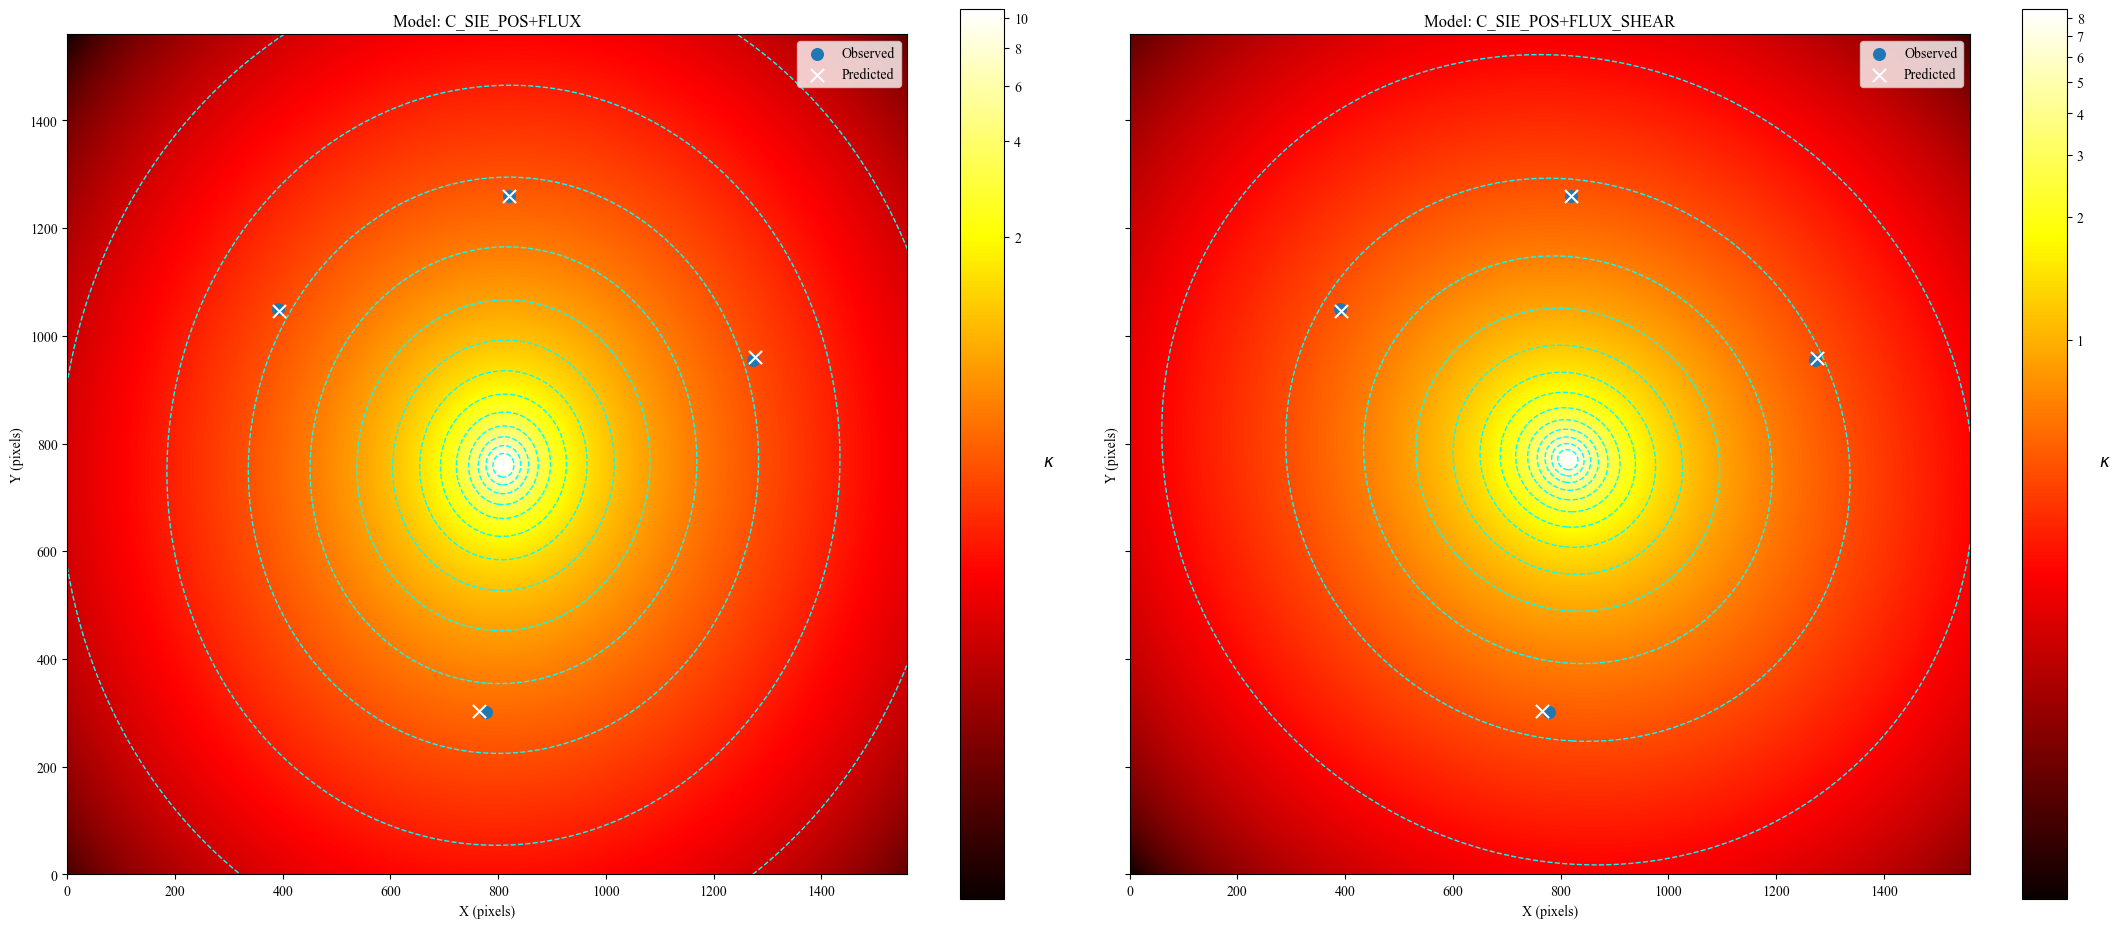

In [19]:
compare_models('C_SIE', 'C_SIE_POS+FLUX', 'C_SIE+SHEAR', 'C_SIE_POS+FLUX_SHEAR') # Replace with real paths

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import os
import re
import subprocess # Using subprocess for better script execution control
# Need sys if switching to subprocess.run
# import sys
# Need get_ipython if using %run magic
from IPython import get_ipython


# ==============================================================
# _process_single_model function remains the same as provided
# ==============================================================
# Helper function to process a single model (normal or shear)
def _process_single_model(model_path, model_ver, obs_coords):
    """
    Processes a single lens model, runs glafic, and extracts results.

    Args:
        model_path (str): Path to the model directory (e.g., 'NFW', 'NFW+SHEAR').
        model_ver (str): Specific version/run name (e.g., 'NFW_POS+FLUX', 'NFW_POS+FLUX_SHEAR').
        obs_coords (pd.DataFrame): DataFrame with observed positions ('x', 'y') already transformed for plotting.

    Returns:
        tuple: Contains:
            - kappa (np.ndarray): The kappa map data.
            - pred (pd.DataFrame): DataFrame with predicted positions and transformed coords ('x_plot', 'y_plot').
            - model_ver (str): The input model version string (for titles).
            - is_shear (bool): Flag indicating if the model included shear.
    """
    print(f"--- Processing Model: {model_ver} ---")

    is_shear = 'SHEAR' in model_path.upper()

    # --- Determine Constraint Type ---
    if 'POS+FLUX' in model_ver:
        constraint = 'pos_flux'
    elif 'POS' in model_ver:
        constraint = 'pos'
    else:
        # Fallback or raise error if constraint type is unclear
        print(f"Warning: Could not determine constraint type for {model_ver}. Assuming 'pos'.")
        constraint = 'pos' # Or raise ValueError("Cannot determine constraint type")

    # --- File Paths ---
    optresult_file = os.path.join(model_path, f"{model_ver}_optresult.dat")
    # point_py_file = os.path.join(model_path, f"{constraint}_point.py") # Not strictly needed for kappa run
    pred_point_dat_file = os.path.join(model_path, f"{model_ver}_point.dat")
    # Ensure the base Kappa path exists before constructing file paths within it
    kappa_base_dir = os.path.join('Kappa', model_path)
    os.makedirs(kappa_base_dir, exist_ok=True) # Create base directory if needed
    kappa_base_path_prefix = os.path.join('Kappa', model_path, model_ver) # Base prefix for output
    kappa_fits_file = os.path.join('Kappa', model_path, f"{model_ver}_lens.fits")
    # Glafic output name needs to be relative or absolute path understood by glafic
    # Using the prefix seems correct if glafic is run from the script's directory
    glafic_output_name = f"'Kappa/{model_path}/{model_ver}'" # Name used inside glafic script

    # --- Read Optimization Results ---
    try:
        with open(optresult_file, 'r') as file:
            opt_result = file.readlines()
    except FileNotFoundError:
        print(f"Error: Optimization result file not found: {optresult_file}")
        return None, None, model_ver, is_shear # Return None if file missing

    # --- Extract Lens Parameters ---
    lens_params = {}
    model_input_map = {} # To store mapping like 1 -> 'sie', 2 -> 'pert'

    # Determine primary lens model name
    model_input_1_name_raw = model_path.lower().replace('+shear', '') # Get base model name
    if 'nfw' in model_input_1_name_raw:
        model_input_1_name = 'anfw' # Adjust if your glafic uses 'nfw'
    elif 'c_sie' in model_input_1_name_raw:
        model_input_1_name = 'csie' # Adjust if your glafic uses 'sie' with core
    elif 'sie' in model_input_1_name_raw:
         model_input_1_name = 'sie'
    elif 'pow' in model_input_1_name_raw:
         model_input_1_name = 'pow'
    elif 'ein' in model_input_1_name_raw:
         model_input_1_name = 'ein'
    else:
        # Add more mappings or a default/error
        print(f"Warning: Unknown primary lens type in {model_path}. Using raw: '{model_input_1_name_raw}'. Add mapping if needed.")
        model_input_1_name = model_input_1_name_raw # Use raw name as fallback

    model_input_map[1] = model_input_1_name
    try:
        # Search for the specific lens line, iterating from the end
        lens_line_1 = next(line for line in reversed(opt_result) if re.match(rf'\s*lens\s+{re.escape(model_input_1_name)}\s+', line))
        lens_params[1] = lens_line_1.split()[2:]
        print(f"Found primary lens params ({model_input_1_name}): {lens_params[1]}")
    except StopIteration:
        print(f"Error: Could not find lens parameters for '{model_input_1_name}' in {optresult_file}")
        return None, None, model_ver, is_shear

    # Extract shear parameters if needed
    if is_shear:
        model_input_2_name = 'pert'
        model_input_map[2] = model_input_2_name
        try:
             lens_line_2 = next(line for line in reversed(opt_result) if re.match(rf'\s*lens\s+{re.escape(model_input_2_name)}\s+', line))
             lens_params[2] = lens_line_2.split()[2:]
             print(f"Found shear lens params ({model_input_2_name}): {lens_params[2]}")
        except StopIteration:
            print(f"Error: Could not find lens parameters for '{model_input_2_name}' (shear) in {optresult_file}")
            # Decide if this is fatal or if we proceed without shear
            return None, None, model_ver, is_shear

    # Extract Source Position
    try:
        # Find the line defining the source point parameters
        # Be robust to potential comment lines or variations
        point_line = next(line for line in reversed(opt_result) if re.match(r'\s*point\s+.*', line))
        # Extract values after 'point', assuming they are z, x, y
        point_values_str = point_line.split()[1:]
        if len(point_values_str) >= 3: # Check we have at least z, x, y
            set_point_values = point_values_str[0:3] # Take first 3 (z, x, y)
            print(f"Found source position params (z, x, y): {set_point_values}")
             # Optional: Validate they are numbers?
            try:
                [float(v) for v in set_point_values]
            except ValueError:
                 raise ValueError(f"Non-numeric source parameters found: {set_point_values}")
        else:
             raise ValueError(f"Expected at least 3 values (z, x, y) for point source, found {len(point_values_str)} in line: {point_line.strip()}")

    except (StopIteration, ValueError) as e:
        print(f"Error: Could not find or parse source position ('point') in {optresult_file}: {e}")
        return None, None, model_ver, is_shear

    # --- Prepare and Run Glafic ---
    # Create output directory specifically for this model's kappa files if glafic doesn't
    # os.makedirs(os.path.dirname(kappa_base_path_prefix), exist_ok=True) # Already handled by kappa_base_dir creation

    # Choose and modify the correct glafic template script
    glafic_template_file = 'kappa_shear_glafic.py' if is_shear else 'kappa_glafic.py'
    glafic_run_script = f"run_glafic_{model_ver}.py" # Use a temporary script name

    try:
        with open(glafic_template_file, 'r') as f_template:
            glafic_script_lines = f_template.readlines()
    except FileNotFoundError:
        print(f"Error: Glafic template script not found: {glafic_template_file}")
        return None, None, model_ver, is_shear

    # Modify the script content
    updated_glafic_script = []
    lens_1_updated = False
    lens_2_updated = False if is_shear else True # Mark as True if no shear expected
    init_updated = False
    point_updated = False

    for line in glafic_script_lines:
        stripped_line = line.strip()
        # Check for lens line 1
        if re.match(rf'\s*glafic\.set_lens\(\s*1\s*,', stripped_line) and not lens_1_updated:
             params_str = ", ".join(map(str, lens_params[1]))
             line = f"glafic.set_lens(1, '{model_input_map[1]}', {params_str})\n"
             print(f"Updated line (Lens 1): {line.strip()}")
             lens_1_updated = True
        # Check for lens line 2 (only if shear model)
        elif is_shear and re.match(rf'\s*glafic\.set_lens\(\s*2\s*,', stripped_line) and not lens_2_updated:
             params_str = ", ".join(map(str, lens_params[2]))
             line = f"glafic.set_lens(2, '{model_input_map[2]}', {params_str})\n"
             print(f"Updated line (Lens 2 - Shear): {line.strip()}")
             lens_2_updated = True
        # Check for init line
        elif re.match(r'\s*glafic\.init\(', stripped_line) and not init_updated:
            # Update output file name and other potential params
            # Using values from the original script provided in comments
            line = f"glafic.init(0.3, 0.7, -1.0, 0.7, {glafic_output_name}, 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n"
            print(f"Updated line (Init): {line.strip()}")
            init_updated = True
        # Check for point line
        elif re.match(r'\s*glafic\.set_point\(', stripped_line) and not point_updated:
            # Update source position (assuming format ID, z, x, y)
            # Glafic usually uses ID, z, x, y
            line = f"glafic.set_point(1, {set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]})\n"
            print(f"Updated line (Point): {line.strip()}")
            point_updated = True

        updated_glafic_script.append(line)

    # Check if all necessary lines were updated
    if not lens_1_updated: print(f"Warning: Lens 1 line 'glafic.set_lens(1,...)' not found/updated in {glafic_template_file}")
    if is_shear and not lens_2_updated: print(f"Warning: Lens 2 (shear) line 'glafic.set_lens(2,...)' not found/updated in {glafic_template_file}")
    if not init_updated: print(f"Warning: Init line 'glafic.init(...)' not found/updated in {glafic_template_file}")
    if not point_updated: print(f"Warning: Point line 'glafic.set_point(...)' not found/updated in {glafic_template_file}")


    # Write the modified script and execute
    try:
        with open(glafic_run_script, 'w') as f_run:
            f_run.writelines(updated_glafic_script)

        print(f"Running glafic script: {glafic_run_script}...")

        # --- Choose Execution Method ---
        # Method 1: %run (Requires IPython/Jupyter)
        ipython = get_ipython()
        if ipython:
            ipython.run_cell(f"%run {glafic_run_script}")
        else:
             # Method 2: subprocess (Use this for standard Python scripts)
             print("IPython environment not detected. Using subprocess to run glafic script.")
             print("Ensure the 'python' command in your PATH executes the correct environment.")
             # Make sure to import sys at the top if using sys.executable
             # result = subprocess.run([sys.executable, glafic_run_script], capture_output=True, text=True, check=True)
             # print("Glafic stdout:", result.stdout)
             # print("Glafic stderr:", result.stderr)
             # Using 'python' command directly - ensure it's the right one
             result = subprocess.run(['python', glafic_run_script], capture_output=True, text=True, check=True)
             # Optional: Print output only if verbose or if there's an error
             if result.stdout: print("Glafic stdout:", result.stdout)
             if result.stderr: print("Glafic stderr:", result.stderr)

        print("Glafic script finished.")

    # Catch subprocess errors specifically if using it
    except subprocess.CalledProcessError as e:
        print(f"Error running glafic script {glafic_run_script} with subprocess:")
        print(f"Return code: {e.returncode}")
        print(f"Stdout: {e.stdout}")
        print(f"Stderr: {e.stderr}")
        return None, None, model_ver, is_shear
    except FileNotFoundError as e:
         # This might happen if 'python' command is not found when using subprocess
         print(f"Error: Could not find executable to run glafic script: {e}")
         print("Ensure Python is in your system's PATH.")
         return None, None, model_ver, is_shear
    except Exception as e:
        print(f"An unexpected error occurred while running glafic script {glafic_run_script}: {e}")
        return None, None, model_ver, is_shear
    finally:
        # Clean up the temporary glafic script
        if os.path.exists(glafic_run_script):
             try:
                 os.remove(glafic_run_script)
                 print(f"Removed temporary script: {glafic_run_script}")
             except OSError as e:
                 print(f"Warning: Could not remove temporary script {glafic_run_script}: {e}")


    # --- Read Predicted Positions ---
    try:
        pred_columns = ['x', 'y', 'mag', 'delay', 'parity'] # Adjust if columns differ
        # Use sep='\s+' for flexible whitespace separation
        pred = pd.read_csv(pred_point_dat_file, sep='\s+', header=None, skiprows=1, names=pred_columns, comment='#')

        # Apply coordinate transformation (ensure consistency with obs data)
        # These values (20, 0.001) seem specific to the coordinate system setup in glafic.init/obs data
        # Verify they match the intended pixel scale and center offset
        # x_center = 20.0 / 0.001? y_center = 20.0 / 0.001? Check glafic init params.
        # Based on glafic.init: pix_scale = 0.001, xmax = 21.56, ymax = 21.56
        # The grid seems centered around (20.0, 20.0) based on the ranges (-1.0, 0.7) and (0.3, 0.7) relative to source? No, that's source plane.
        # The init grid is xcen=20, ycen=20, xrng=21.56, yrng=21.56, pix=0.001
        # Grid runs from xcen - xrng/2 to xcen + xrng/2
        # x_min = 20.0 - 21.56/2 = 9.22
        # x_max = 20.0 + 21.56/2 = 30.78
        # Number of pixels = xrng / pix = 21.56 / 0.001 = 21560 ?? That's huge.
        # Let's assume the 20, 0.001 transform is correct based on prior usage.
        pred['x_plot'] = (pred['x'] - 20) / 0.001
        pred['y_plot'] = (pred['y'] - 20) / 0.001
        print(f"Loaded {len(pred)} predicted positions from {pred_point_dat_file}")

        # Optional: Remove 5th image for shear models (if needed)
        if is_shear and len(pred) > 4:
             print('Shear model has > 4 images. Removing lowest magnification image (potential 5th image).')
             try:
                 # Ensure 'mag' column is numeric
                 pred['mag'] = pd.to_numeric(pred['mag'])
                 # Find index of image with minimum absolute magnification
                 lowest_mag_index = pred['mag'].abs().idxmin()
                 print(f"Removing image at index {lowest_mag_index} with mag {pred.loc[lowest_mag_index, 'mag']}")
                 pred = pred.drop(lowest_mag_index).reset_index(drop=True)
             except KeyError:
                 print("Warning: 'mag' column not found for removing 5th image.")
             except Exception as e_mag:
                 print(f"Warning: Error processing magnification for 5th image removal: {e_mag}")


    except FileNotFoundError:
        print(f"Error: Predicted positions file not found: {pred_point_dat_file}")
        # If kappa run failed, FITS might not exist, but point.dat might. Return point data if possible.
        kappa_data = _read_kappa_fits(kappa_fits_file)
        return kappa_data, None, model_ver, is_shear
    except Exception as e:
        print(f"Error processing predicted positions file {pred_point_dat_file}: {e}")
        kappa_data = _read_kappa_fits(kappa_fits_file)
        return kappa_data, None, model_ver, is_shear

    # --- Read Kappa FITS File ---
    # Moved reading kappa to a helper to reduce nesting here and allow calling it even if point reading fails
    kappa = _read_kappa_fits(kappa_fits_file)
    if kappa is None:
        print(f"Warning: Proceeding without kappa data for {model_ver}.")
        # We might still have prediction data, so return that
        return None, pred, model_ver, is_shear

    print(f"--- Finished Processing: {model_ver} ---")
    return kappa, pred, model_ver, is_shear

# Helper function to read kappa FITS to avoid code duplication
def _read_kappa_fits(kappa_fits_file):
    """Reads the kappa map from the specified FITS file."""
    try:
        with fits.open(kappa_fits_file) as hdu_list:
            # Check if the HDU list structure is as expected
            # Assuming primary HDU contains multiple image extensions as numpy arrays
            if isinstance(hdu_list[0].data, np.ndarray) and hdu_list[0].data.ndim >= 3:
                # Assuming kappa is the 4th plane (index 3) based on original script
                # Verify this structure (e.g., using fitsheader command or opening manually)
                # Common glafic output: [image, alpha_x, alpha_y, kappa, gamma_1, gamma_2, ...]
                if hdu_list[0].data.shape[0] > 3:
                    kappa = np.array(hdu_list[0].data[3])
                    print(f"Loaded kappa map (shape: {kappa.shape}) from {kappa_fits_file}")
                    return kappa
                else:
                    print(f"Error: HDU 0 in {kappa_fits_file} has fewer than 4 image planes (shape: {hdu_list[0].data.shape}). Cannot extract kappa.")
                    return None
            # Alternative: Check if kappa is in a separate extension, e.g., hdu_list[3]
            # elif len(hdu_list) > 3 and hdu_list[3].name == 'KAPPA': # Example check
            #     kappa = np.array(hdu_list[3].data)
            #     print(f"Loaded kappa map (shape: {kappa.shape}) from extension 3 in {kappa_fits_file}")
            #     return kappa
            else:
                print(f"Error: Unexpected FITS structure in {kappa_fits_file}. Could not find kappa data.")
                print(f"HDU list info: {hdu_list.info()}")
                # print(f"Primary HDU data type: {type(hdu_list[0].data)}, shape: {getattr(hdu_list[0].data, 'shape', 'N/A')}")
                return None
    except FileNotFoundError:
        print(f"Error: Kappa FITS file not found: {kappa_fits_file}")
        return None
    except Exception as e:
        print(f"Error reading kappa FITS file {kappa_fits_file}: {e}")
        return None


# Main comparison function (MODIFIED)
def compare_models(model_path_1, model_ver_1, model_path_2, model_ver_2):
    """
    Compares two lens models side-by-side by plotting their kappa maps
    with consistent color bars and contour levels, overlaying observed/predicted positions.

    Args:
        model_path_1 (str): Path for model 1 (e.g., 'NFW', 'NFW+SHEAR').
        model_ver_1 (str): Version/run name for model 1 (e.g., 'NFW_POS+FLUX').
        model_path_2 (str): Path for model 2.
        model_ver_2 (str): Version/run name for model 2.
    """

    # --- Load Observed Positions (once) ---
    # Make sure the path is correct relative to where the script is run
    # Or use an absolute path
    obs_file = 'obs_point/obs_point_(POS+FLUX).dat'
    try:
        # Try guessing column widths if fixed-width fails, or use sep='\s+'
        try:
            obs = pd.read_fwf(obs_file, header=None, names=['x', 'y', 'm', 'pos_err', 'm_err', 'ex1', 'ex2'], skiprows=1)
        except ValueError: # Fallback if fwf fails (e.g., space-separated)
             print("Reading obs_file with read_fwf failed, trying with sep='\s+'...")
             obs = pd.read_csv(obs_file, sep='\s+', header=None, names=['x', 'y', 'm', 'pos_err', 'm_err', 'ex1', 'ex2'], skiprows=1, comment='#')

        plot_obs = obs[['x', 'y', 'm']].copy() # Use .copy() to avoid SettingWithCopyWarning
        # Apply coordinate transformation (MUST match the one used for predicted points)
        plot_obs['x_plot'] = (plot_obs['x'] - 20) / 0.001
        plot_obs['y_plot'] = (plot_obs['y'] - 20) / 0.001
        print(f"Loaded {len(plot_obs)} observed positions from {obs_file}")
    except FileNotFoundError:
        print(f"Error: Observed positions file not found: {obs_file}")
        return
    except Exception as e:
        print(f"Error processing observed positions file {obs_file}: {e}")
        return

    # --- Process Each Model ---
    results = {}
    models_to_process = {
        1: (model_path_1, model_ver_1),
        2: (model_path_2, model_ver_2)
    }

    for i, (m_path, m_ver) in models_to_process.items():
        kappa, pred, _, is_shear_flag = _process_single_model(m_path, m_ver, plot_obs)
        # Store results even if some parts are None, check later
        results[i] = {'kappa': kappa, 'pred': pred, 'ver': m_ver, 'is_shear': is_shear_flag}


    # --- Determine Global Kappa Range and Common Levels/Normalization ---
    valid_kappas = [res['kappa'] for res in results.values() if res and res['kappa'] is not None]

    common_norm = None
    common_levels = None
    global_vmin = None
    global_vmax = None
    log_stretch_a = 1000 # Default LogStretch parameter

    if len(valid_kappas) > 0:
        # Calculate global min/max across all valid kappa maps
        global_min_val = min(np.min(k) for k in valid_kappas)
        global_max_val = max(np.max(k) for k in valid_kappas)
        print(f"Global kappa range (raw): min={global_min_val:.4g}, max={global_max_val:.4g}")

        # For LogStretch and logspace, we need positive values.
        # Find the minimum *positive* value across all valid kappas.
        min_positive_val = float('inf')
        for k in valid_kappas:
            if np.any(k > 0):
                min_positive_val = min(min_positive_val, np.min(k[k > 0]))

        if min_positive_val == float('inf'):
            print("Warning: No positive kappa values found in any model. Cannot use LogStretch or logspace contours.")
            # Optionally fall back to linear or skip normalization/contours
            global_vmin = global_min_val
            global_vmax = global_max_val
            # Could create a linear norm here if desired
            # from astropy.visualization import LinearStretch, NormalizeVisualizer
            # common_norm = ImageNormalize(vmin=global_vmin, vmax=global_vmax, stretch=LinearStretch())

        else:
             # Use the smallest positive value as vmin for LogStretch
             # Add a small epsilon factor just in case it's exactly zero somewhere? Not needed if we select k[k>0]
             global_vmin = min_positive_val
             global_vmax = global_max_val # Max can be anything

             # Ensure vmin < vmax
             if global_vmin >= global_vmax:
                 print(f"Warning: Calculated global vmin ({global_vmin:.4g}) >= global vmax ({global_vmax:.4g}). Adjusting vmax slightly.")
                 # Adjust vmax slightly, maybe 10% higher, or use a fixed small range
                 global_vmax = global_vmin * 1.1 if global_vmin > 0 else 0.1

             print(f"Global kappa range for LogNorm/LogLevels: vmin={global_vmin:.4g}, vmax={global_vmax:.4g}")

             # Create the common normalization object
             common_norm = ImageNormalize(vmin=global_vmin, vmax=global_vmax, stretch=LogStretch(a=log_stretch_a))

             # Create the common contour levels (logarithmically spaced)
             num_levels = 10 # Reduced number of levels for clarity
             try:
                 common_levels = np.logspace(np.log10(global_vmin), np.log10(global_vmax), num_levels)
                 print(f"Generated {len(common_levels)} common log contour levels.")
             except ValueError as e:
                  print(f"Error generating logspace contour levels (vmin={global_vmin}, vmax={global_vmax}): {e}")
                  common_levels = None # Fallback: don't plot contours

    else:
        print("No valid kappa data found for any model. Cannot determine common scale.")


    # --- Plotting ---
    fig, axs = plt.subplots(1, 2, figsize=(22, 10), sharex=True, sharey=True) # Increased size slightly
    axs = axs.flatten() # Ensure axs is always iterable

    plot_titles = {1: model_ver_1, 2: model_ver_2}
    plotted_cb = None # To store the colorbar mappable if only one plot works

    for i in range(1, 3):
        ax = axs[i-1]
        res = results.get(i)
        title = plot_titles[i]

        if res and res['kappa'] is not None:
            kappa = res['kappa']
            pred = res['pred'] # Might be None if point reading failed

            try:
                # Determine extent based on kappa shape
                # Assuming pixel coords starting from (0,0) at lower-left
                ny, nx = kappa.shape
                extent = [0, nx, 0, ny] # [left, right, bottom, top]

                # Use the COMMON normalization if available
                current_norm = common_norm if common_norm else ImageNormalize(kappa) # Fallback to individual norm if common failed

                im = ax.imshow(kappa, cmap='hot', norm=current_norm, origin='lower',
                               extent=extent, interpolation='nearest')
                plotted_cb = im # Store the mappable for the colorbar

                # Plot COMMON contour levels if available
                if common_levels is not None and len(common_levels) > 0:
                    contour = ax.contour(
                        kappa, # Data for contour calculation
                        levels=common_levels, # Use the COMMON levels
                        colors='cyan',
                        linewidths=1.5, # Thinner lines
                        linestyles='dashed',
                        alpha=1,
                        extent=extent, # Match imshow extent
                    )
                    # Optional: Add labels to contours (can get crowded)
                    ax.clabel(contour, inline=True, fontsize=12, fmt='%.2g')

                # Plot predicted and observed positions
                # Use the transformed plot coordinates
                ax.scatter(plot_obs['x_plot'], plot_obs['y_plot'], s=80, lw=5, label='Observed', marker='o', alpha=1)
                if pred is not None:
                    ax.scatter(pred['x_plot'], pred['y_plot'], c='white', s=100, label='Predicted', marker='x', lw=1.5, alpha=1)
                else:
                    ax.text(0.05, 0.95, 'Pred. points missing', transform=ax.transAxes, color='white', ha='left', va='top')


                ax.set_title(f'Model: {title}')
                ax.legend()
                ax.set_xlabel('X (pixels)') # Adjust label if units are different
                ax.set_ylabel('Y (pixels)') # Adjust label if units are different
                ax.set_aspect('equal', adjustable='box')
                # Set limits based on extent or data range if needed
                ax.set_xlim(extent[0], extent[1])
                ax.set_ylim(extent[2], extent[3])

                # Add colorbar to each plot - it will use the norm attached to 'im'
                cbar = fig.colorbar(im, ax=ax, label=r'$\kappa$', shrink=0.8) # Added shrink
                # cbar.set_label(r'$\kappa$', rotation=0, labelpad=15, fontsize=12) # Alternative label style


            except Exception as plot_err:
                 print(f"Error plotting model {i} ({title}): {plot_err}")
                 ax.set_title(f'Model: {title}\n(Plotting Failed)')
                 ax.text(0.5, 0.5, 'Plotting Error', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                 ax.set_xlabel('X (pixels)')
                 ax.set_ylabel('Y (pixels)')

        else:
            # Handle case where model processing failed or kappa was missing
            status = "Processing Failed" if not res else "Kappa Data Missing"
            ax.set_title(f'Model: {title}\n({status})')
            ax.text(0.5, 0.5, status, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_xlabel('X (pixels)')
            ax.set_ylabel('Y (pixels)')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to prevent title overlap
    # Add overall title if desired
    # fig.suptitle(f"Comparison: {model_ver_1} vs {model_ver_2}", fontsize=16)

    # Ensure the output directory exists
    output_dir = 'kappa/Images'
    os.makedirs(output_dir, exist_ok=True)
    output_filename = os.path.join(output_dir, f'comparison_{model_ver_1}_vs_{model_ver_2}.png')

    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Comparison plot saved to: {output_filename}")
    plt.show()


# --- Example Usage ---

# Make sure you have the necessary glafic template files:
# 'kappa_glafic.py' (for normal models)
# 'kappa_shear_glafic.py' (for shear models)
# And the observation file: 'obs_point/obs_point_(POS+FLUX).dat'

# Also ensure the glafic executable is runnable and the input model directories/files exist.

# --- PLEASE UNCOMMENT AND MODIFY THE EXAMPLE CALLS BELOW WITH YOUR ACTUAL PATHS/VERSIONS ---

# Example call (replace with your actual model paths and versions):
# Assuming you have models like 'NFW/NFW_POS+FLUX' and 'NFW+SHEAR/NFW_POS+FLUX_SHEAR'
# And their corresponding _optresult.dat files exist.

# Before running, ensure the base directories and necessary input files exist.
# You might need to create dummy files/dirs if just testing the script structure.
# Example:
# os.makedirs('NFW', exist_ok=True)
# os.makedirs('NFW+SHEAR', exist_ok=True)
# os.makedirs('obs_point', exist_ok=True)
# os.makedirs('Kappa/NFW', exist_ok=True)      # Glafic needs these output dirs
# os.makedirs('Kappa/NFW+SHEAR', exist_ok=True)
# open('NFW/NFW_POS+FLUX_optresult.dat', 'a').close() # Create dummy optresult
# open('NFW+SHEAR/NFW_POS+FLUX_SHEAR_optresult.dat', 'a').close() # Create dummy optresult
# open('obs_point/obs_point_(POS+FLUX).dat', 'a').close() # Create dummy obs file
# open('kappa_glafic.py', 'a').close() # Create dummy template
# open('kappa_shear_glafic.py', 'a').close() # Create dummy template
# Add necessary content to the dummy files for the script to proceed,
# especially the lens/point lines in optresult and basic commands in templates.


print("Starting model comparison...")
# # ----> UNCOMMENT AND EDIT THIS LINE WITH YOUR MODELS <----
# compare_models('NFW', 'NFW_POS+FLUX', 'NFW+SHEAR', 'NFW_POS+FLUX_SHEAR')
# # Example with different base models (ensure these paths/files exist)
# compare_models('SIE', 'SIE_POS+FLUX_run1', 'NFW', 'NFW_POS+FLUX_run2')

print("\n--- Script finished ---")
print("Please ensure you uncommented and edited the 'compare_models' call with your actual model paths and versions.")

Starting model comparison...

--- Script finished ---
Please ensure you uncommented and edited the 'compare_models' call with your actual model paths and versions.


Loaded 4 observed positions from obs_point/obs_point_(POS+FLUX).dat
--- Processing Model: SIE_POS ---
Found primary lens params (sie): ['0.2613', '1.580350e+02', '2.080960e+01', '2.075891e+01', '1.287589e-01', '-4.437098e+00', '0.000000e+00', '0.000000e+00']
Found source position params (z, x, y): ['1.0000', '2.081270e+01', '2.078004e+01']
Updated line (Init): glafic.init(0.3, 0.7, -1.0, 0.7, 'Kappa/SIE/SIE_POS', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)
Updated line (Lens 1): glafic.set_lens(1, 'sie', 0.2613, 1.580350e+02, 2.080960e+01, 2.075891e+01, 1.287589e-01, -4.437098e+00, 0.000000e+00, 0.000000e+00)
Updated line (Point): glafic.set_point(1, 1.0000, 2.081270e+01, 2.078004e+01)
Running glafic script: run_glafic_SIE_POS.py...


######## writing lens properties
 zs = 1.000000e+00 
 output file name = Kappa/SIE/SIE_POS_lens.fits 



Glafic script finished.
Removed temporary script: run_glafic_SIE_POS.py
Loaded 4 predicted positions from SIE/SIE_POS_point.dat
Loaded kappa map (shape: (1560, 1560)) from Kappa/SIE/SIE_POS_lens.fits
--- Finished Processing: SIE_POS ---
--- Processing Model: SIE_POS_SHEAR ---
Found primary lens params (sie): ['0.2613', '1.578910e+02', '2.081329e+01', '2.076512e+01', '1.002482e-01', '2.732969e+01', '0.000000e+00', '0.000000e+00']
Found shear lens params (pert): ['0.2613', '1.000000e+00', '2.092914e+01', '2.064130e+01', '3.532260e-02', '1.438319e+02', '0.000000e+00', '0.000000e+00']
Found source position params (z, x, y): ['1.0000', '2.082080e+01', '2.077732e+01']
Updated line (Init): glafic.init(0.3, 0.7, -1.0, 0.7, 'Kappa/SIE+SHEAR+FIX/SIE_POS_SHEAR', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)
Updated line (Lens 1): glafic.set_lens(1, 'sie', 0.2613, 1.578910e+02, 2.081329e+01, 2.076512e+01, 1.002482e-01, 2.732969e+01, 0.000000e+00, 0.000000e+00)
Updated line (Lens 2 - Shear):

######## writing lens properties
 zs = 1.000000e+00 
 output file name = Kappa/SIE+SHEAR+FIX/SIE_POS_SHEAR_lens.fits 



Removed temporary script: run_glafic_SIE_POS_SHEAR.py
Loaded 4 predicted positions from SIE+SHEAR+FIX/SIE_POS_SHEAR_point.dat
Loaded kappa map (shape: (1560, 1560)) from Kappa/SIE+SHEAR+FIX/SIE_POS_SHEAR_lens.fits
--- Finished Processing: SIE_POS_SHEAR ---
Global kappa range (raw): min=0.2099, max=621
Global kappa range for LogNorm/LogLevels: vmin=0.2099, vmax=621
Generated 10 common log contour levels.
Comparison plot saved to: kappa/Images/comparison_SIE_POS_vs_SIE_POS_SHEAR.png


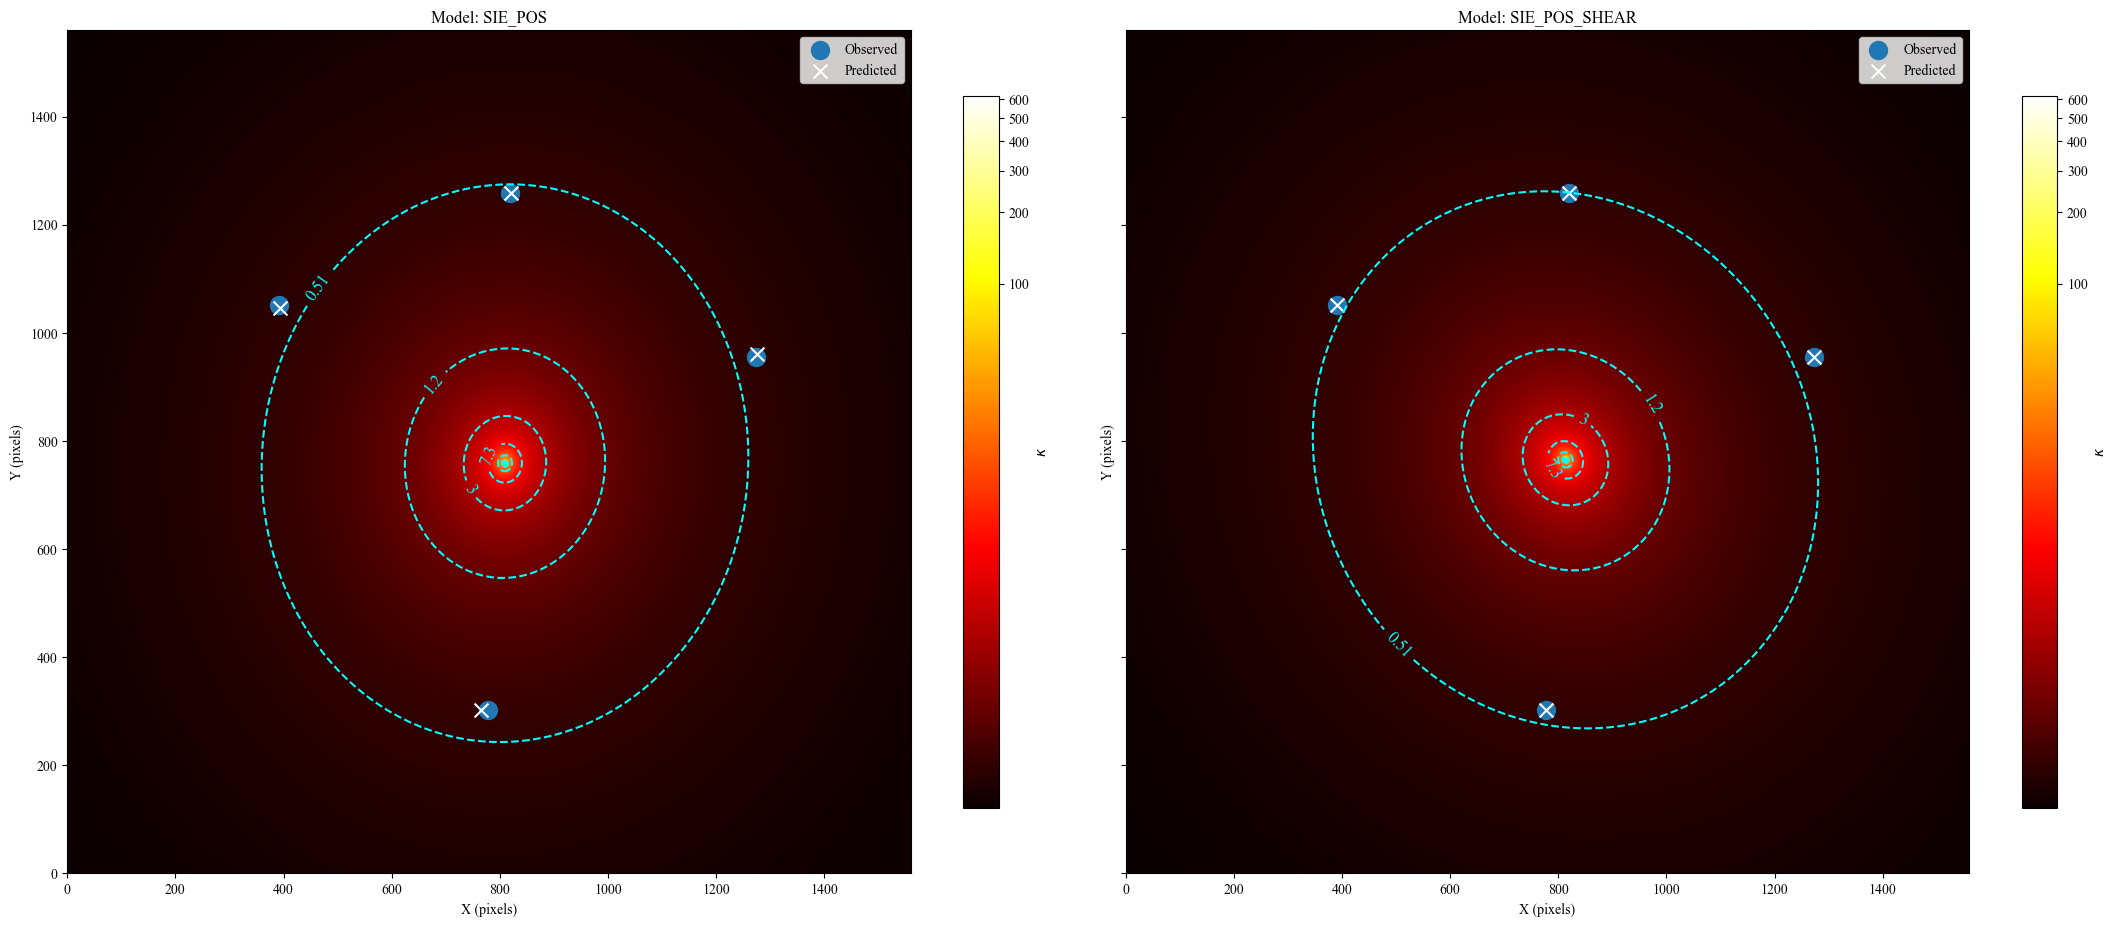

In [34]:
compare_models('SIE', 'SIE_POS', 'SIE+SHEAR+FIX', 'SIE_POS_SHEAR')

In [205]:
# Plot profile 
# Load the data
columns = ['r', 'kappa']
data = pd.read_csv( model_path + '/' + model_ver + '_kaprad.dat', sep=' ', header=None, names=columns)
data2 = pd.read_csv(model_path + '/' + model_ver + '_kapcum.dat', sep=' ', header=None, names=columns)

FileNotFoundError: [Errno 2] No such file or directory: 'NFW+SHEAR/NFW_POS+FLUX_SHEAR_kaprad.dat'

In [ ]:
# Percet Height

kap_pred = [data2.loc[(data2['r'] - rad).abs().idxmin(), 'kappa'] for rad in pred['rad']]
kap_max = max(data2['kappa'])

percent_height = [kap/kap_max for kap in kap_pred]
percent_height = [ph + 0.001 for ph in percent_height]

inset_percent_height = [ph + 0.68 for ph in percent_height]


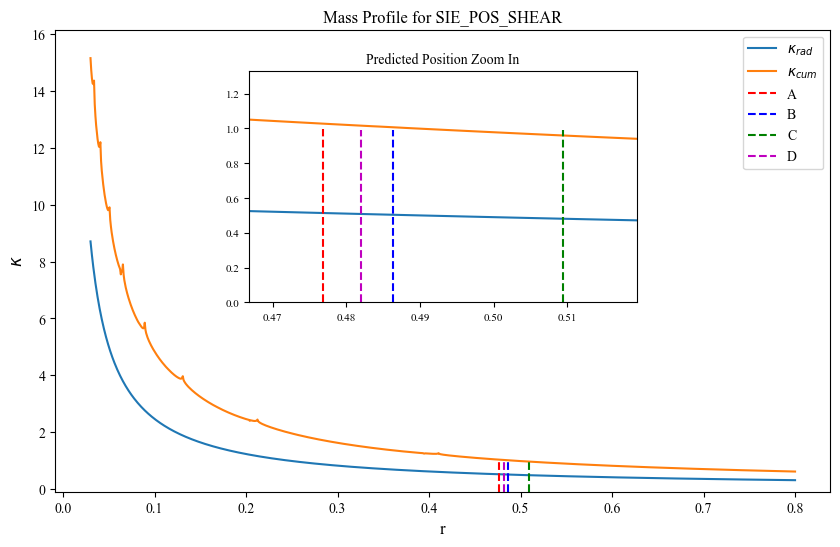

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
plt.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
plt.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=percent_height[0], ymin=0)
plt.axvline(x=pred['rad'][1], color='b', linestyle='--', label='B', ymax=percent_height[1], ymin=0)
plt.axvline(x=pred['rad'][2], color='g', linestyle='--', label='C', ymax=percent_height[2], ymin=0)
plt.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=percent_height[3], ymin=0)
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Mass Profile for ' + model_ver)
plt.ylim(-0.1, max(data2['kappa']) + 1)
plt.legend()

# Add inset plot
ax_inset = inset_axes(plt.gca(), width="50%", height="50%", loc="upper center", borderpad=3)
ax_inset.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
ax_inset.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
ax_inset.set_xlim(inset_x_lim_l, inset_x_lim_u)  # Adjust the x-axis range for the inset
ax_inset.set_ylim(0, max(kap_pred) + 0.3)  # Adjust the y-axis range for the inset
ax_inset.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=inset_percent_height[0], ymin=0)
ax_inset.axvline(x=pred['rad'][1], color='b', linestyle='--', label='C', ymax=inset_percent_height[1], ymin=0)
ax_inset.axvline(x=pred['rad'][2], color='g', linestyle='--', label='B', ymax=inset_percent_height[2], ymin=0)
ax_inset.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=inset_percent_height[3], ymin=0)
ax_inset.set_title('Predicted Position Zoom In', fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

plt.show()

In [ ]:
# Shear Plots
